<center><h1> ST420: Statistical Learning and Big Data </h1></center>
    
<center><h2> Assignment 1: Exploring polynomial regression </h2></center>

<center><h2> Gabija Vaisvilaite </h2></center>

First we import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Now we get the data.

In [2]:
df = pd.read_excel(r'regression_data.xlsx')

First, we define a function, which, given $x \in \mathbb{R}$, returns the value $y = f^*(x)$, where $f^*(x) = (x-2)(x-1)x(x+1)(x+2)$ is the true function underpinning the relationship between $Y$ and $X$.

In [3]:
def function(x):
    """
    Returns f*(x), i.e., the true function f* underpinning the relationship between Y and X.
    """
    y = (x-2)*(x-1)*x*(x+1)*(x+2)
    
    return y

And now we create the plot of the data together with the true function $f^*$.

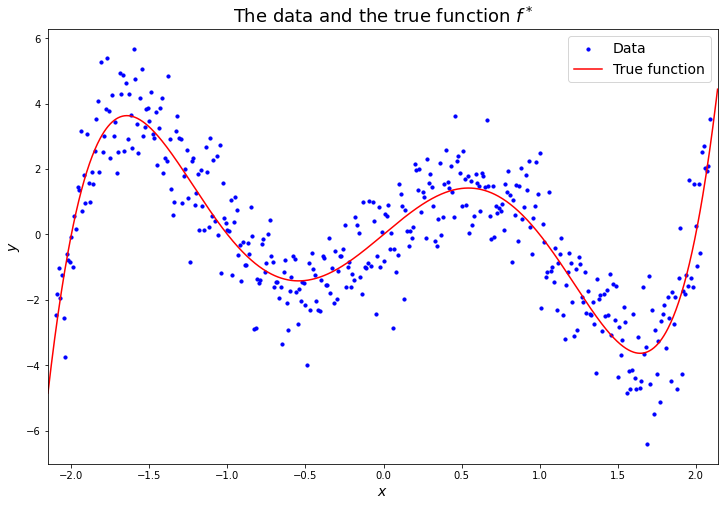

In [4]:
# Intialising an array of x values over which we want to plot the function
xmin = min(df['x'])-0.05
xmax = max(df['x'])+0.05
x = np.linspace(xmin,xmax, 1000)

# Plotting
plt.rcParams['figure.figsize'] = [12, 8]
scat_plt = plt.scatter(df['x'], df['y'], s=10, c='blue')
line_plt = plt.plot(x, function(x), c='red')
plt.xlim(xmin,xmax)
plt.xlabel(r'$x$',fontsize = 14)
plt.ylabel(r'$y$',fontsize = 14)
plt.title(r'The data and the true function $f^*$',fontsize = 18)
plt.legend(handles = [scat_plt, line_plt[0]], labels  = ['Data', 'True function'],fontsize=14)
plt.show()

Since our chosen loss function is squared error loss, we have that the risk is mean squared error. Thus to estimate the risk of the true function $f^*$ from the whole data set we use a built-in function (see below).

In [5]:
mean_squared_error(function(df['x']), df['y'])

1.0261088372299407

The computed risk is approximately what we expected it to be as our data $y$ is generated by adding Gaussian noise with mean 0 and variance 1 after applying $f^∗$ to each $x$.

For the next task we define a function *polyf*, which, given an array of coefficients and a number $x \in \mathbb{R}$ returns the value $f(x)$ where $f$ is the polynomial with coefficients in the given array in order of descending power. 

In [6]:
def polyf(array, x):
    """
    Returns f(x) for an input x, where f is a polynomial with coefficients in inputed array (in order of descending power)
    """
    # Initial values
    i = np.shape(array)[0]
    y = 0
    for k in range(0,i):
        y = y + array[k]*pow(x,i-k-1)
    
    return y

Now we split our data into training and testing sets as required (taking the first 30 points of the original data set for the training data, and the rest for the testing data).

In [7]:
X_train = df.iloc[:30,0].to_numpy()
y_train = df.iloc[:30,1].to_numpy()
X_test = df.iloc[30:,0].to_numpy()
y_test = df.iloc[30:,1].to_numpy()

Here we fit polynomial regression models (fitting polynomials of degree 1 through 10) on the training data as defined above, making training and testing predictions as well as computing mean squared errors for both training and testing data for each polynomial regression.

In [8]:
# Initialising vectors
coef = [0] * 11 # A vector to store coefficients of a polynomial fitted to the training data
mse_train = [0] * 11 # A vector to store training risk of models
mse_test = [0] * 11 # A vector to store testing risk of models

# A loop for each model
for k in range(0,11):
    # Getting coefficients of a polynomial of degree k that best fits the training data
    coef[k] = np.polyfit(X_train, y_train, k)
    # Making predictions
    y_pred_train = polyf(coef[k],X_train)
    y_pred_test = polyf(coef[k],X_test)
    # Computing risks
    mse_train[k] = mean_squared_error(y_train, y_pred_train)
    mse_test[k] = mean_squared_error(y_test, y_pred_test)

And finally we plot prediction error against model complexity.

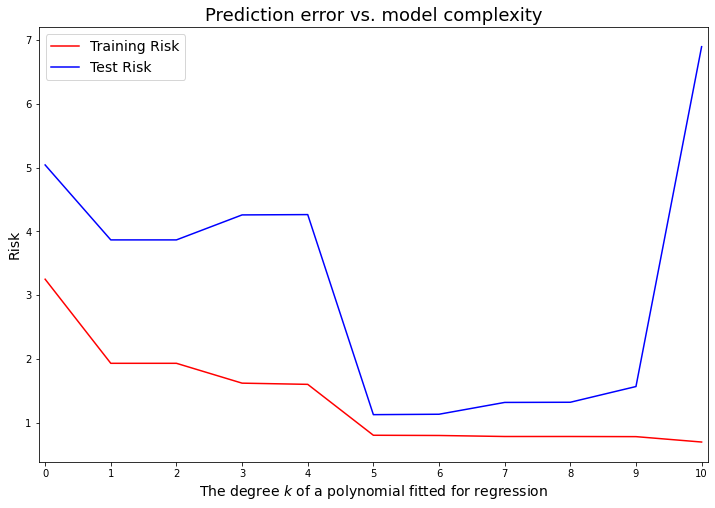

In [9]:
# Plotting
plt.rcParams['figure.figsize'] = [12, 8]
train_line = plt.plot(np.array((range(0, 11))), mse_train, c='red')
test_line = plt.plot(np.array((range(0, 11))), mse_test, c='blue')
plt.xlim(-0.1,10.1)
plt.xticks(np.array((range(0,11))),np.array((range(0,11))))
plt.xlabel(r'The degree $k$ of a polynomial fitted for regression',fontsize = 14)
plt.ylabel(r'Risk',fontsize = 14)
plt.title(r'Prediction error vs. model complexity',fontsize = 18)
plt.legend(handles = [train_line[0], test_line[0]], labels  = ['Training Risk', 'Test Risk'],fontsize=14)
plt.show()


As expected, the risk is lower for the training data and the risk for the testing data is minimal when we fit a polynomial of degree $k=5$. For models of lower complexity we can see higher risk because of underfitting. For models of higher complexity we can see higher risk for the testing data and lower risk for training data due to overfitting.

We can see from the plot (and confirm below) that the most appropriate polynomial regression model for this data is a polynomial with degree $k=5$, as it has lowest testing MSE.

In [10]:
# Finding the model with lowest testing risk 
best = np.argmin(mse_test)
best

5

We now fit the polynomial (with degree k=5) regression model on the training data and make predictions.

In [11]:
best_pol = np.polyfit(X_train, y_train, 5)
best_train_pred = polyf(best_pol,X_train)
best_test_pred = polyf(best_pol,X_test)

We plot the training data, test data and the fitted function for this model on a single figure.

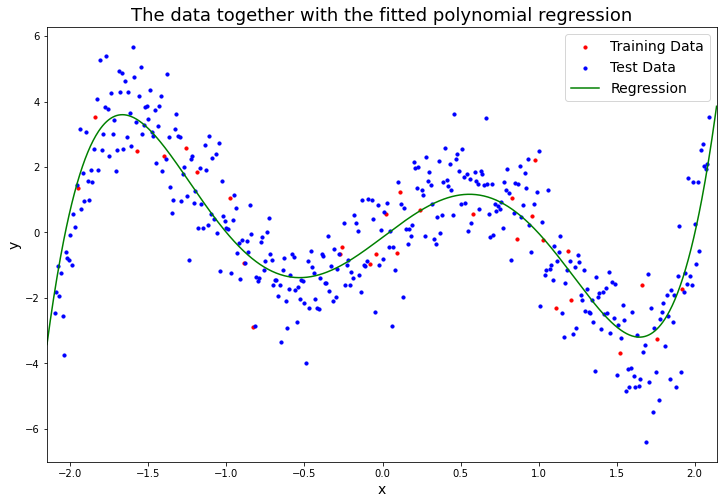

In [12]:
# Plotting
plt.rcParams['figure.figsize'] = [12, 8]
train_data = plt.scatter(X_train, y_train, s=10, c='red')
test_data = plt.scatter(X_test, y_test, s=10, c='blue')
fitted_poly = plt.plot(x, polyf(best_pol,x), c='green')
plt.xlim(xmin,xmax)
plt.xlabel(r'x',fontsize = 14)
plt.ylabel(r'y',fontsize = 14)
plt.title(r'The data together with the fitted polynomial regression',fontsize = 18)
plt.legend(handles = [train_data, test_data, fitted_poly[0]], labels  = ['Training Data', 'Test Data', 'Regression'],fontsize=14)
plt.show()

Based on previous analysis, the most appropriate polynomial regression model is one fitting a polynomial of degree $k=5$. We now define a function *pol_regression*, which, given an integer $n$, uses the first $n$ of the original data to fit the polynomial (of degree $k=5$) regression model, and uses the remaider of the data to test the model. The function also computes the training and test risks of the model. 

In [13]:
def pol_regression(n):
    # Splitting the original data into training and test sets.
    X_train = df.iloc[:n,0].to_numpy()
    y_train = df.iloc[:n,1].to_numpy()
    X_test = df.iloc[n:,0].to_numpy()
    y_test = df.iloc[n:,1].to_numpy()
    
    # Fitting the polynomial regression.
    coefficients = np.polyfit(X_train, y_train, 5)
    
    # Making predictions
    y_pred_train = polyf(coefficients,X_train)
    y_pred_test = polyf(coefficients,X_test)
    
    # Obtaining the risks.
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    return mse_train, mse_test

For each $n \in \big[ 10, 50 \big]$ (the amount of the training data) we now obtain estimated training and test risks using the previously defined function *pol_regression*.

In [14]:
# Initialising vectors to store MSE scores
mse_train = [0] * 41
mse_test = [0] * 41
for n in range(10,51):
    # Obtaining MSE scores
    mse_train[n-10], mse_test[n-10] = pol_regression(n)

And now we plot the log of the estimated training and test risks.

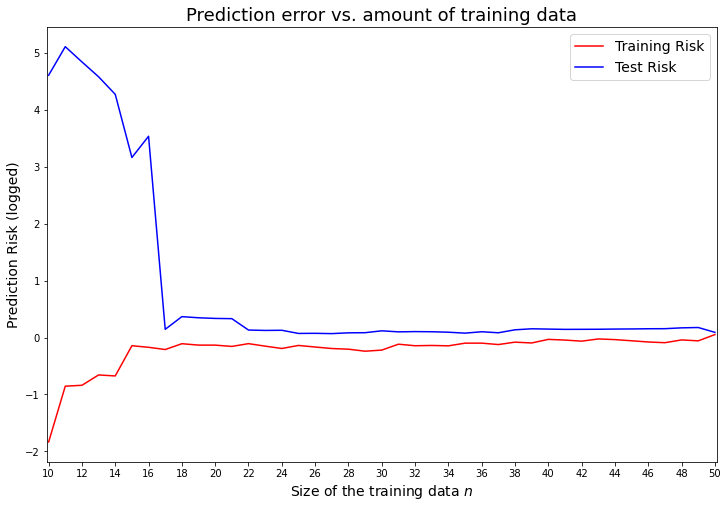

In [15]:
# Plotting
plt.rcParams['figure.figsize'] = [12, 8]
log_train_line = plt.plot(np.array((range(0, 41))), np.log(mse_train), c='red')
log_test_line = plt.plot(np.array((range(0, 41))), np.log(mse_test), c='blue')
plt.xticks(np.array((range(0, 41, 2))), np.array((range(10, 51, 2))))
plt.xlim(-0.1, 40.1)
plt.xlabel(r'Size of the training data $n$',fontsize = 14)
plt.ylabel(r'Prediction Risk (logged)',fontsize = 14)
plt.title(r'Prediction error vs. amount of training data',fontsize = 18)
plt.legend(handles = [log_train_line[0], log_test_line[0]], labels  = ['Training Risk', 'Test Risk'],fontsize=14)
plt.show()

The plot obtained looks as expected. The training error is always smaller than the testing error, as the regression is fitted using the training data. For small training size $n$ the testing error is large and the training error is low due to overfitting.